http://www.ercot.com/gridinfo/load

The archives are also there:
http://www.ercot.com/gridinfo/load/load_hist

There is a difference between the archives and real time, as I have learned :) The real time is based on telemetry substation data, whereas the historical is based on final values. This usually accounts for about a 1% difference, mostly white noise. It would be a good exercise for students to both correct this historical bias and also build timeseries forecasting models on this live data feed. ERCOT also publishes their own load forecasts, so you can use that as a good baseline for any model.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [3]:
import pandas as pd
import numpy as np

In [4]:
!sudo -H pip3 install xlrd

In [5]:
!sudo apt-get install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [6]:
import datetime as dt

def str_to_datetime(date_str):
    if date_str.endswith("24:00"):
        return pd.to_datetime(date_str[:10], format="%m/%d/%Y") + dt.timedelta(days=1)
    else:
        return pd.to_datetime(date_str, format="%m/%d/%Y %H:%M")

### 2020

In [7]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/Native_Load_2020.zip" -o native_load_2020.zip
!unzip -o native_load_2020.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  536k  100  536k    0     0   504k      0  0:00:01  0:00:01 --:00:02  206k:--:--  504k
Archive:  native_load_2020.zip
  inflating: Native_Load_2020.xlsx   


In [8]:
df2020 = pd.read_excel("Native_Load_2020.xlsx")


In [9]:
df2020['date'] = df2020["HourEnding"].apply(str_to_datetime)
df2020.drop('HourEnding', inplace=True, axis='columns')
df2020.set_index('date', inplace=True)

df2020.sort_index(inplace=True)

### 2019 

In [10]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/Native_Load_2019.zip" -o native_load_2019.zip
!unzip -o native_load_2019.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1067k  100 1067k    0     0   961k      0  0:00:01  0:00:01 --:--:--  961k
Archive:  native_load_2019.zip
  inflating: Native_Load_2019.xlsx   


In [11]:
df2019 = pd.read_excel("Native_Load_2019.xlsx")



In [12]:
import re
for g in df2019["HourEnding"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/03/2019 02:00 DST


In [13]:
df2019["HourEnding"].replace("11/03/2019 02:00 DST", "11/03/2019 02:00", inplace=True)

In [14]:
len(df2019)

8760

In [15]:
df2019['date'] = df2019["HourEnding"].apply(str_to_datetime)
df2019.drop('HourEnding', inplace=True, axis='columns')
df2019.set_index('date', inplace=True)

df2019.sort_index(inplace=True)

### 2018

In [16]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_load_2018.zip" -o native_load_2018.zip
!unzip -o native_load_2018.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1067k  100 1067k    0     0   845k      0  0:00:01  0:00:01 --:--:--  845k
Archive:  native_load_2018.zip
  inflating: Native_Load_2018.xlsx   


In [17]:
df2018 = pd.read_excel("Native_Load_2018.xlsx")


In [18]:
import re
for g in df2018["HourEnding"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/04/2018 02:00 DST


In [19]:
df2018["HourEnding"].replace("11/04/2018 02:00 DST", "11/04/2018 02:00", inplace=True)

In [20]:

df2018['date'] = df2018["HourEnding"].apply(str_to_datetime)
df2018.drop('HourEnding', inplace=True, axis='columns')
df2018.set_index('date', inplace=True)

### 2017

In [21]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_load_2017.zip" -o native_load_2017.zip
!unzip -o native_load_2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1093k  100 1093k    0     0  1017k      0  0:00:01  0:00:01 --:--:-- 1017k
Archive:  native_load_2017.zip
  inflating: native_Load_2017.xlsx   


In [22]:
df2017 = pd.read_excel("native_Load_2017.xlsx")

In [23]:
import re
for g in df2017["Hour Ending"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/05/2017 02:00 DST


In [24]:
df2017["Hour Ending"].replace("11/05/2017 02:00 DST", "11/05/2017 02:00", inplace=True)

In [25]:
df2017['date'] = df2017["Hour Ending"].apply(str_to_datetime)
df2017.drop('Hour Ending', inplace=True, axis='columns')
df2017.set_index('date', inplace=True)

In [26]:
len(df2017)/24

365.0

### 2016

In [27]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_Load_2016.zip" -o native_load_2016.zip
!unzip -o native_load_2016.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1095k  100 1095k    0     0  1151k      0 --:--:-- --:--:-- --:--:-- 1151k
Archive:  native_load_2016.zip
  inflating: native_Load_2016.xlsx   


In [28]:
df2016 = pd.read_excel("native_Load_2016.xlsx")

In [29]:
df2016.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [30]:
df2016.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [31]:
df2016.set_index('date', inplace=True)

In [32]:
df2016 = df2016.fillna(method="ffill")

In [33]:
len(df2016)/24

366.0

### 2015

In [34]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/native_Load_2015.xls" -o native_load_2015.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1468k      0  0:00:01  0:00:01 --:--:-- 1468k


In [35]:
df2015 = pd.read_excel("native_load_2015.xls")

In [36]:
df2015.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2015-01-01 01:00:00.003,9844.200268,1350.784678,2078.060021,901.770195,13640.024978,3607.904503,6731.301663,1470.814721,39624.861027
1,2015-01-01 01:59:59.997,9653.456269,1333.434943,2057.993265,890.150373,13425.121941,3609.619438,6602.935629,1440.832944,39013.544802
2,2015-01-01 03:00:00.000,9502.299659,1323.908498,2039.019542,880.926639,13286.070909,3573.158363,6530.663273,1430.495044,38566.541927


In [37]:
df2015.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [38]:
df2015.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [39]:
df2015.set_index('date', inplace=True)

In [40]:
len(df2015)/24

365.0

### 2014

In [41]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2014_ERCOT_Hourly_Load_Data.xls" -o native_load_2014.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1593k      0  0:00:01  0:00:01 --:--:-- 1593k


In [42]:
df2014 = pd.read_excel("native_load_2014.xls")

In [43]:
df2014.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2014-01-01 01:00:00.003,9101.691219,1338.197939,1820.206244,793.458458,12298.801147,3236.109065,6121.146143,1102.523505,35812.133719
1,2014-01-01 01:59:59.997,8907.975782,1328.940064,1809.180861,791.141630,12297.109823,3246.493375,6091.018850,1098.774771,35570.635156
2,2014-01-01 03:00:00.000,8738.460973,1317.990846,1804.524573,789.791906,12285.295247,3217.721388,6060.017515,1097.716762,35311.519210


In [44]:
df2014.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [45]:
df2014.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [46]:
df2014.set_index('date', inplace=True)

In [47]:
len(df2014)/24

365.0

### 2013

In [48]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2013_ERCOT_Hourly_Load_Data.xls" -o native_load_2013.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0   820k      0  0:00:02  0:00:02 --:--:--  820k


In [49]:
df2013 = pd.read_excel("native_load_2013.xls")

In [50]:
df2013.head(3)

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,2013-01-01 01:00:00.003,7607.189871,1074.024285,1411.823159,763.069242,10370.322921,2206.945802,4368.528687,883.029500,28684.933467
1,2013-01-01 01:59:59.997,7389.267519,1035.189180,1403.601093,754.425986,10153.942806,2160.082197,4233.635250,872.532258,28002.676290
2,2013-01-01 03:00:00.000,7179.748411,1036.216739,1395.131213,746.215515,9989.243532,2065.369913,4082.897707,868.951334,27363.774363


In [51]:
df2013.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [52]:
df2013.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [53]:
df2013.set_index('date', inplace=True)

In [54]:
len(df2013)/24

365.0

### 2012

In [55]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2012_ERCOT_Hourly_Load_Data.xls" -o native_load_2012.xls
df2012 = pd.read_excel("native_load_2012.xls")
df2012.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2012.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1762k  100 1762k    0     0  1919k      0 --:--:-- --:--:-- --:--:-- 1917k


In [56]:
len(df2012)/24

366.0

### 2011



In [57]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2011_ERCOT_Hourly_Load_Data.xls" -o native_load_2011.xls
df2011 = pd.read_excel("native_load_2011.xls")
df2011.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2011.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1922k      0 --:--:-- --:--:-- --:--:-- 1920k


In [58]:
len(df2011)/24

365.0

### 2010

In [59]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2010_ERCOT_Hourly_Load_Data.xls" -o native_load_2010.xls
df2010 = pd.read_excel("native_load_2010.xls")
df2010.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2010.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1267k      0  0:00:01  0:00:01 --:--:-- 1266k


In [60]:
len(df2010)/24

365.0

In [61]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2009_ERCOT_Hourly_Load_Data.xls" -o native_load_2009.xls
df2009 = pd.read_excel("native_load_2009.xls")
df2009.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2009.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1610k      0  0:00:01  0:00:01 --:--:-- 1612k


In [62]:
len(df2009)/24

365.0

### Concatenate 

In [63]:
df = pd.concat([df2020, df2019, df2018, df2017, df2016, df2015, df2014, df2013, df2012, df2011, df2010, df2009], axis='index').sort_index()

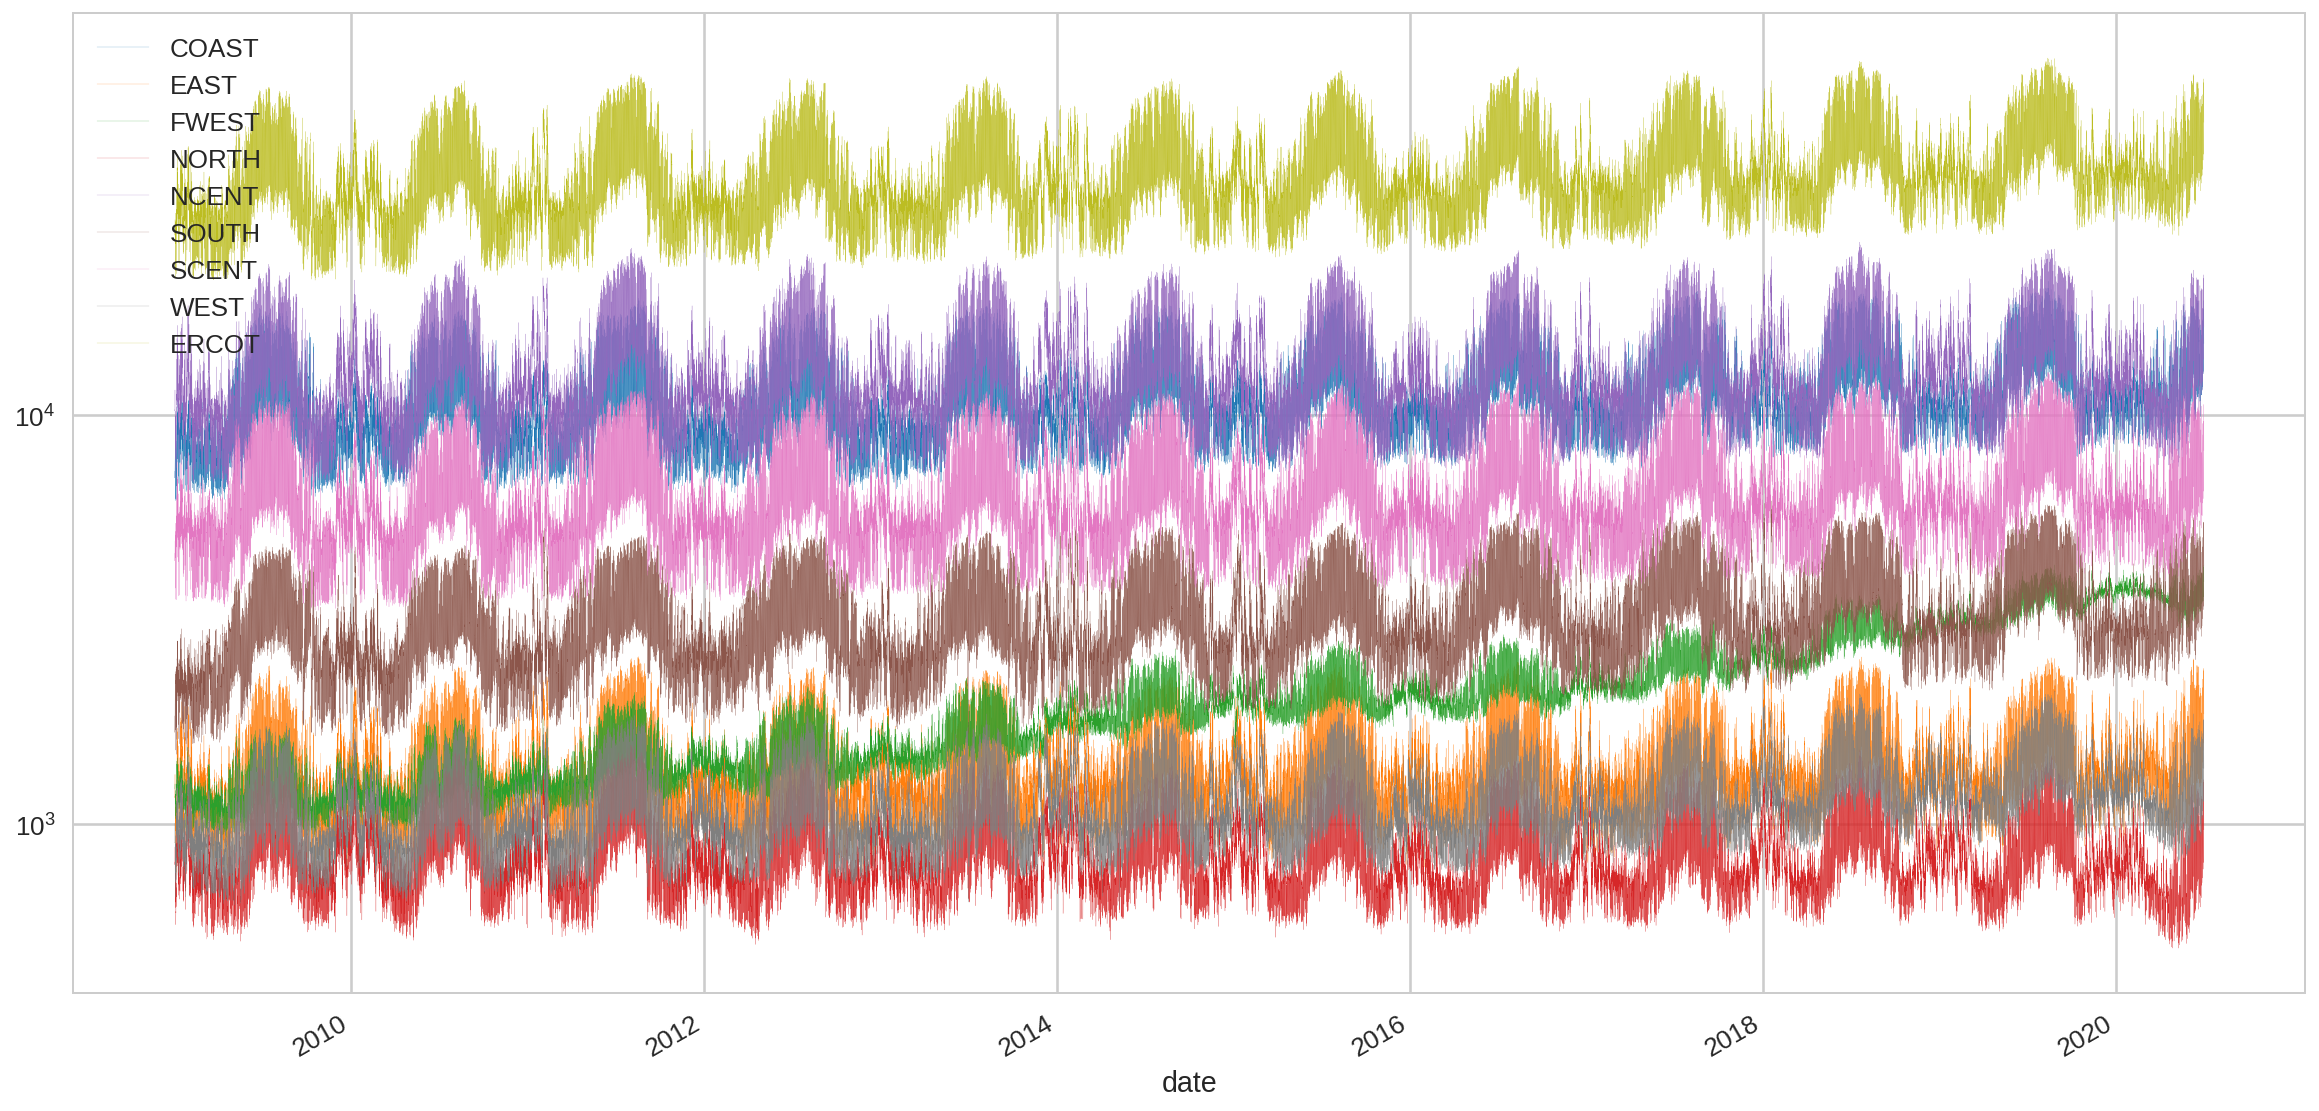

In [64]:
df.plot(figsize=(20,10), linewidth=0.1, logy=True)

In [65]:
len(df)

100775

In [66]:
df [ np.delete(df.columns.values.copy(), -1) ].sum().sum()

3951788903.1547523

In [67]:
df.sum().ERCOT

3951788903.1562495

## Extracting Seasonal Components: Daily, Weekly, Yearly

<ipython-input-68-11b8134769c6>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df.ERCOT, model='multiplicative', freq=24)


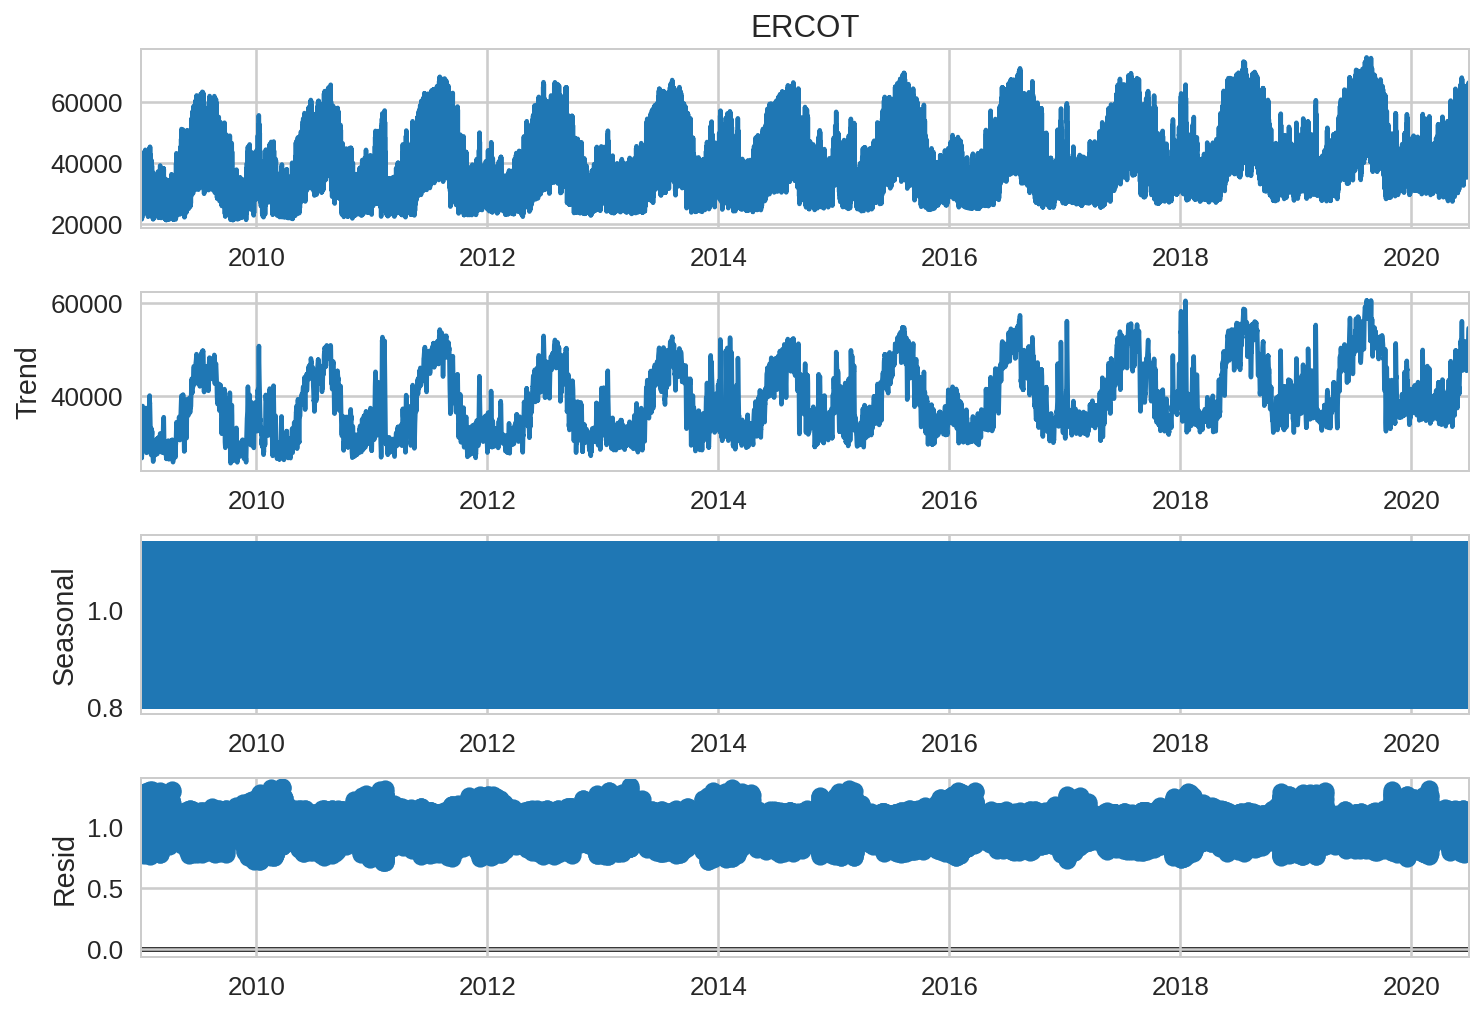

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df.ERCOT, model='multiplicative', freq=24)  
fig = decomposition.plot()  

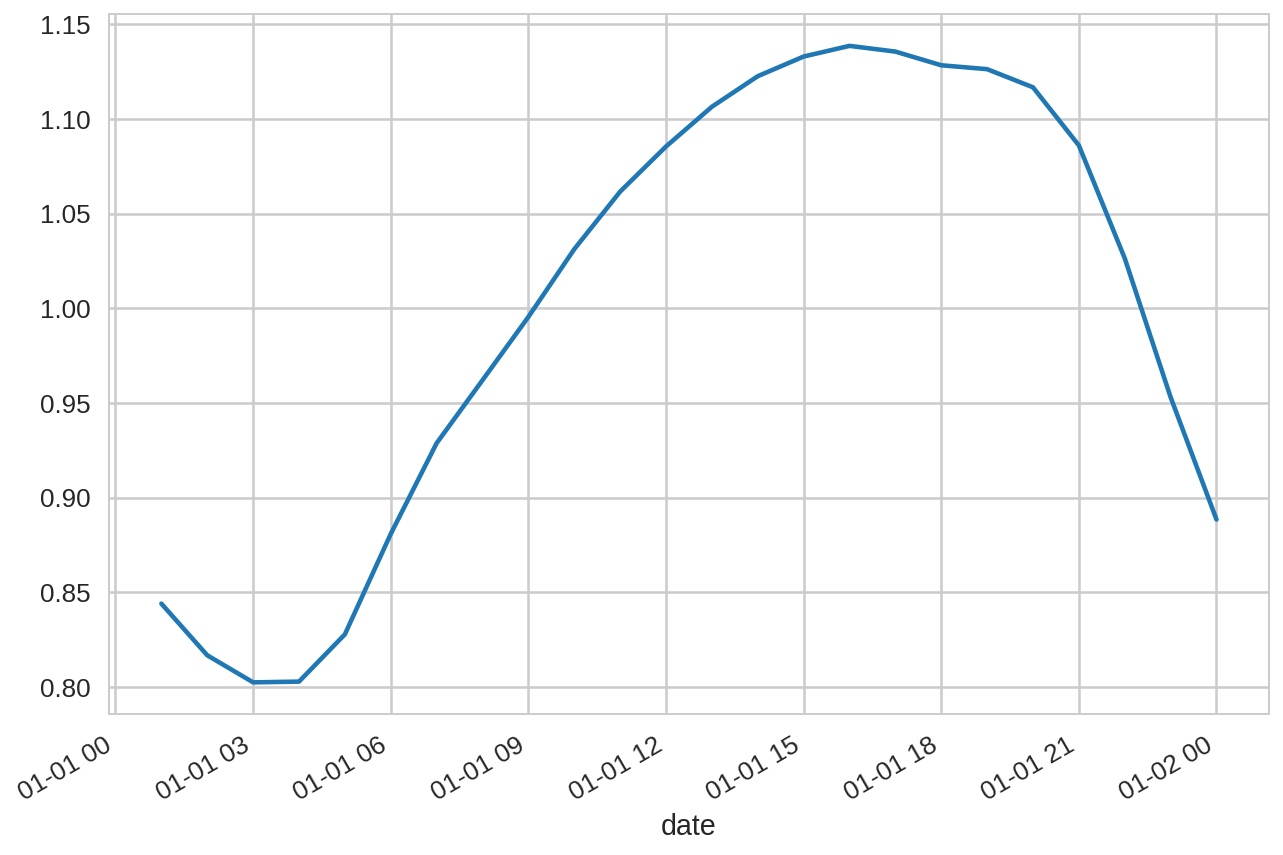

In [69]:
daily_seasonal = decomposition.seasonal.copy()
daily_seasonal[:24].plot()

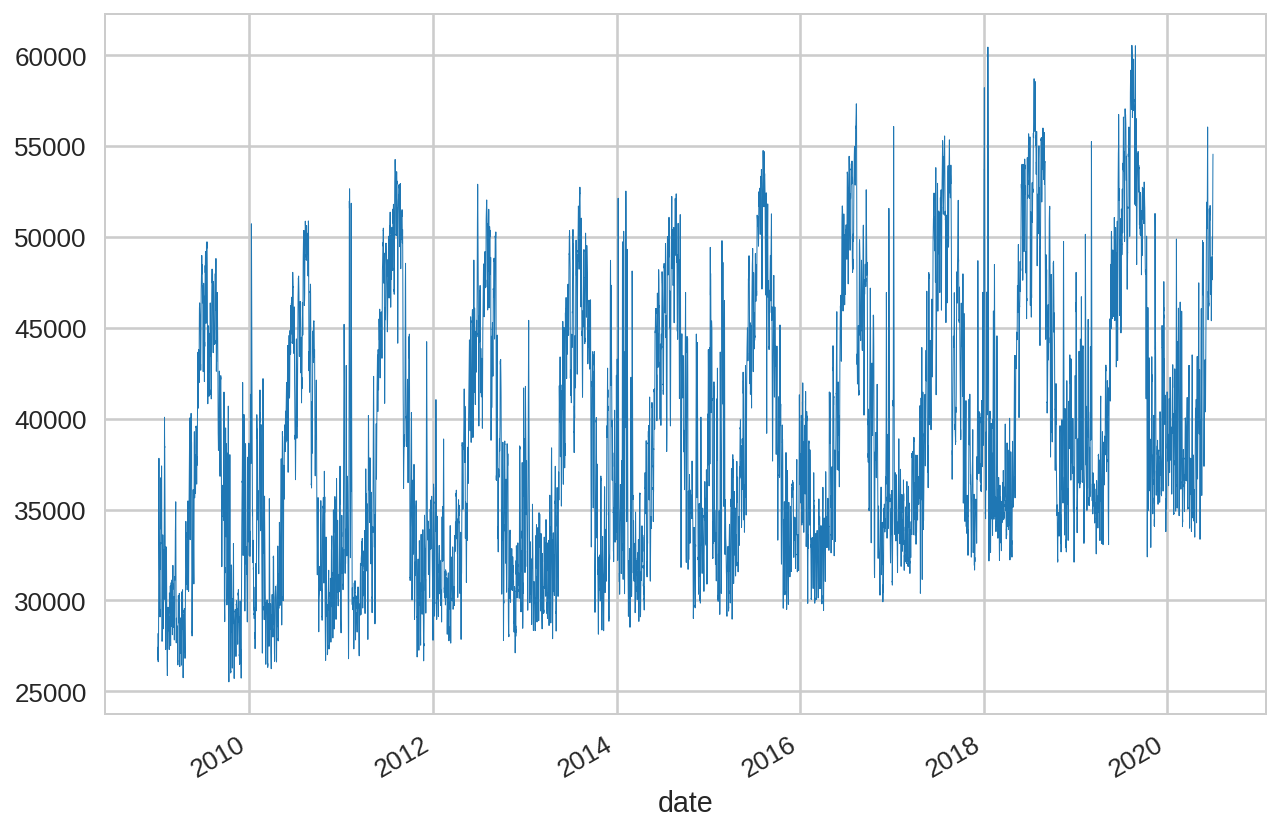

In [70]:
trend = decomposition.trend[12:-12]
trend.plot(linewidth=0.5)

<ipython-input-71-d5027735c265>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*7)


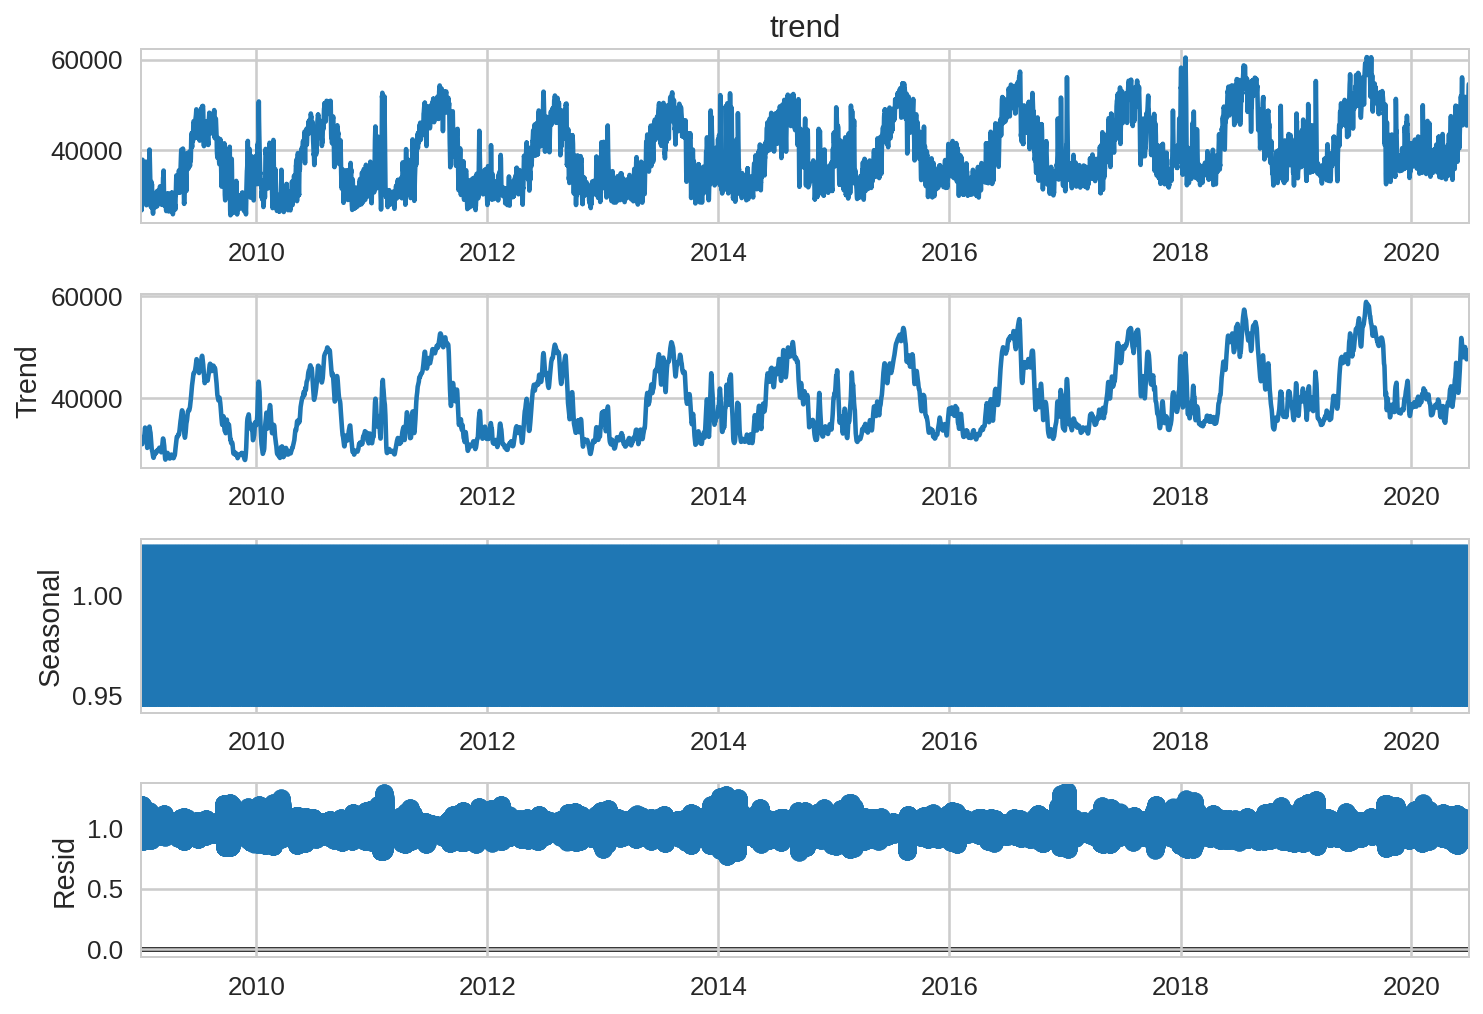

In [71]:
decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*7)  
fig = decomposition.plot()  

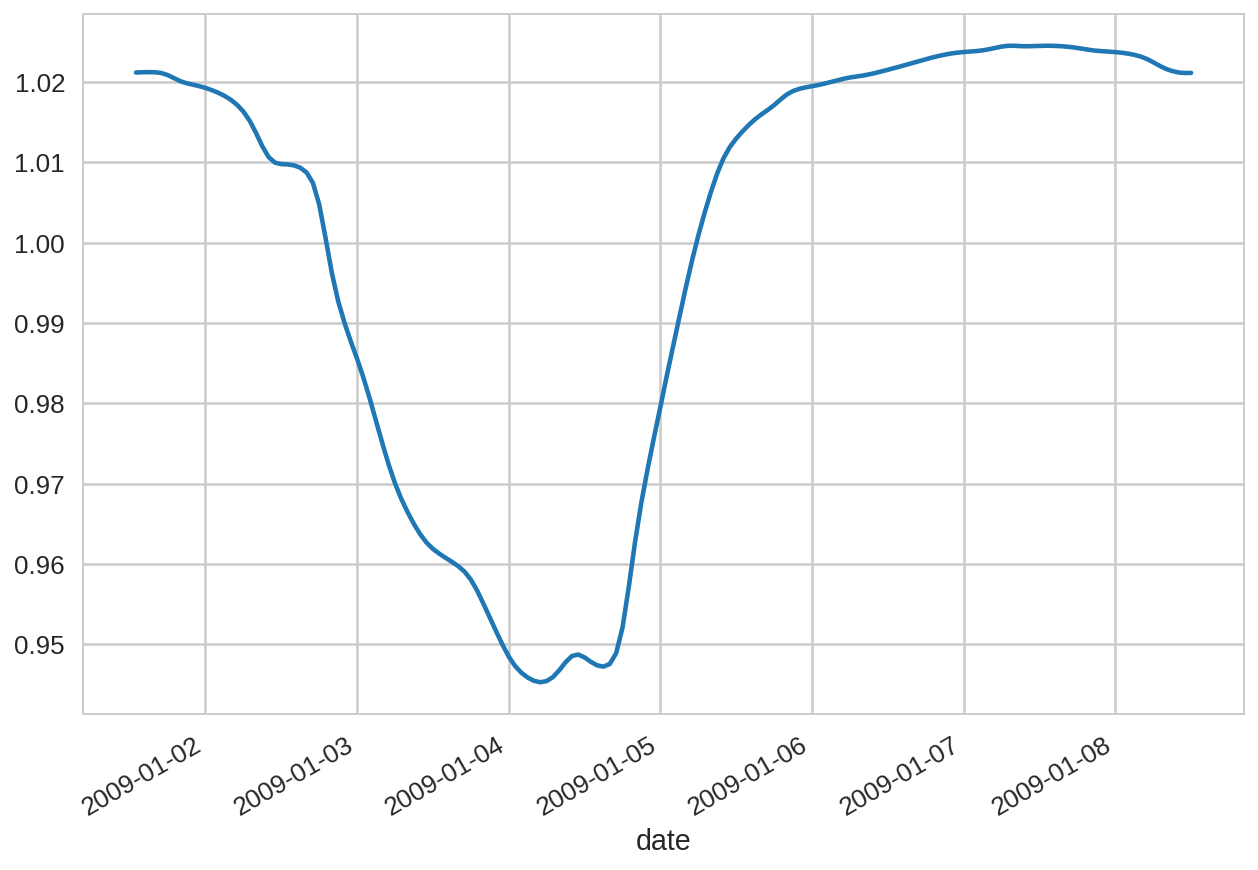

In [72]:
weekly_seasonal = decomposition.seasonal[:24*7]
weekly_seasonal.plot()

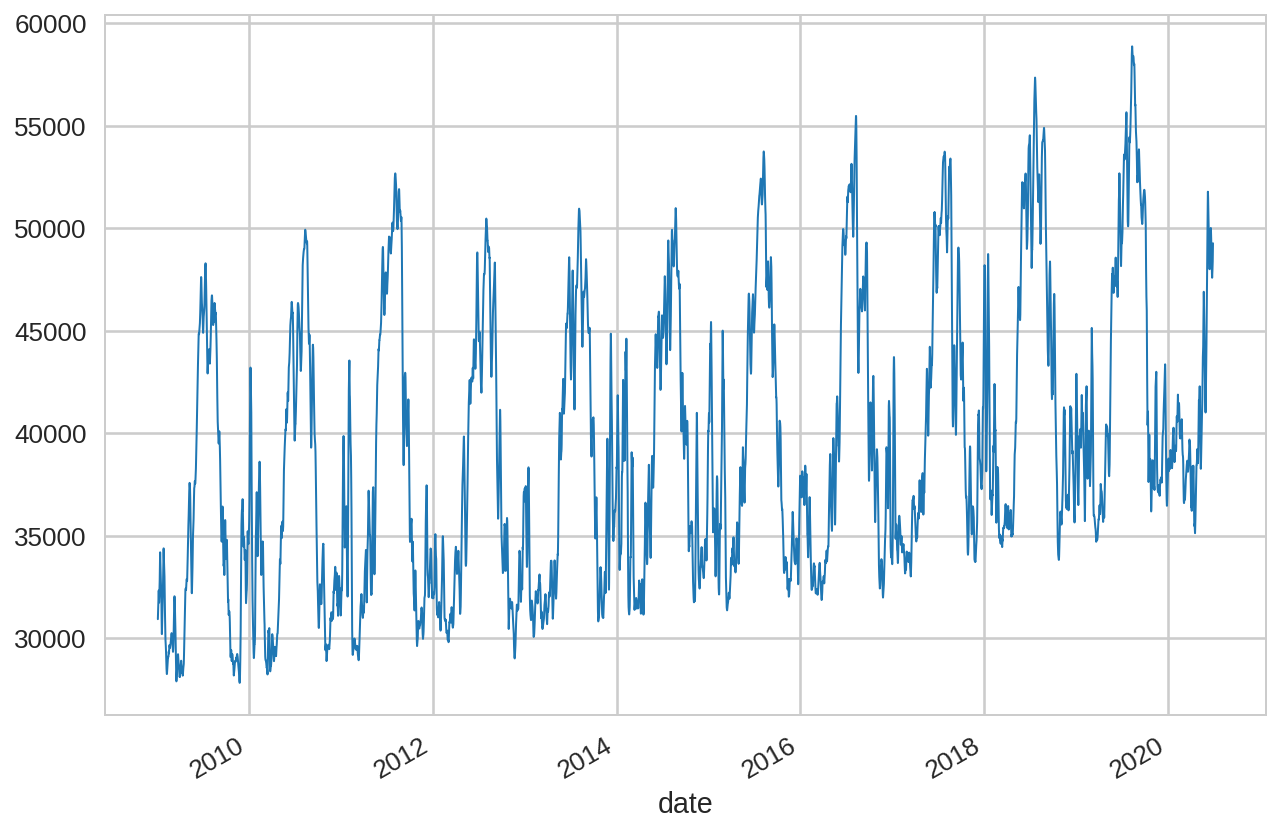

In [73]:
trend = decomposition.trend[12*7:-12*7]
trend.plot(linewidth=1)

<ipython-input-74-1f6f781a4ecf>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*365)


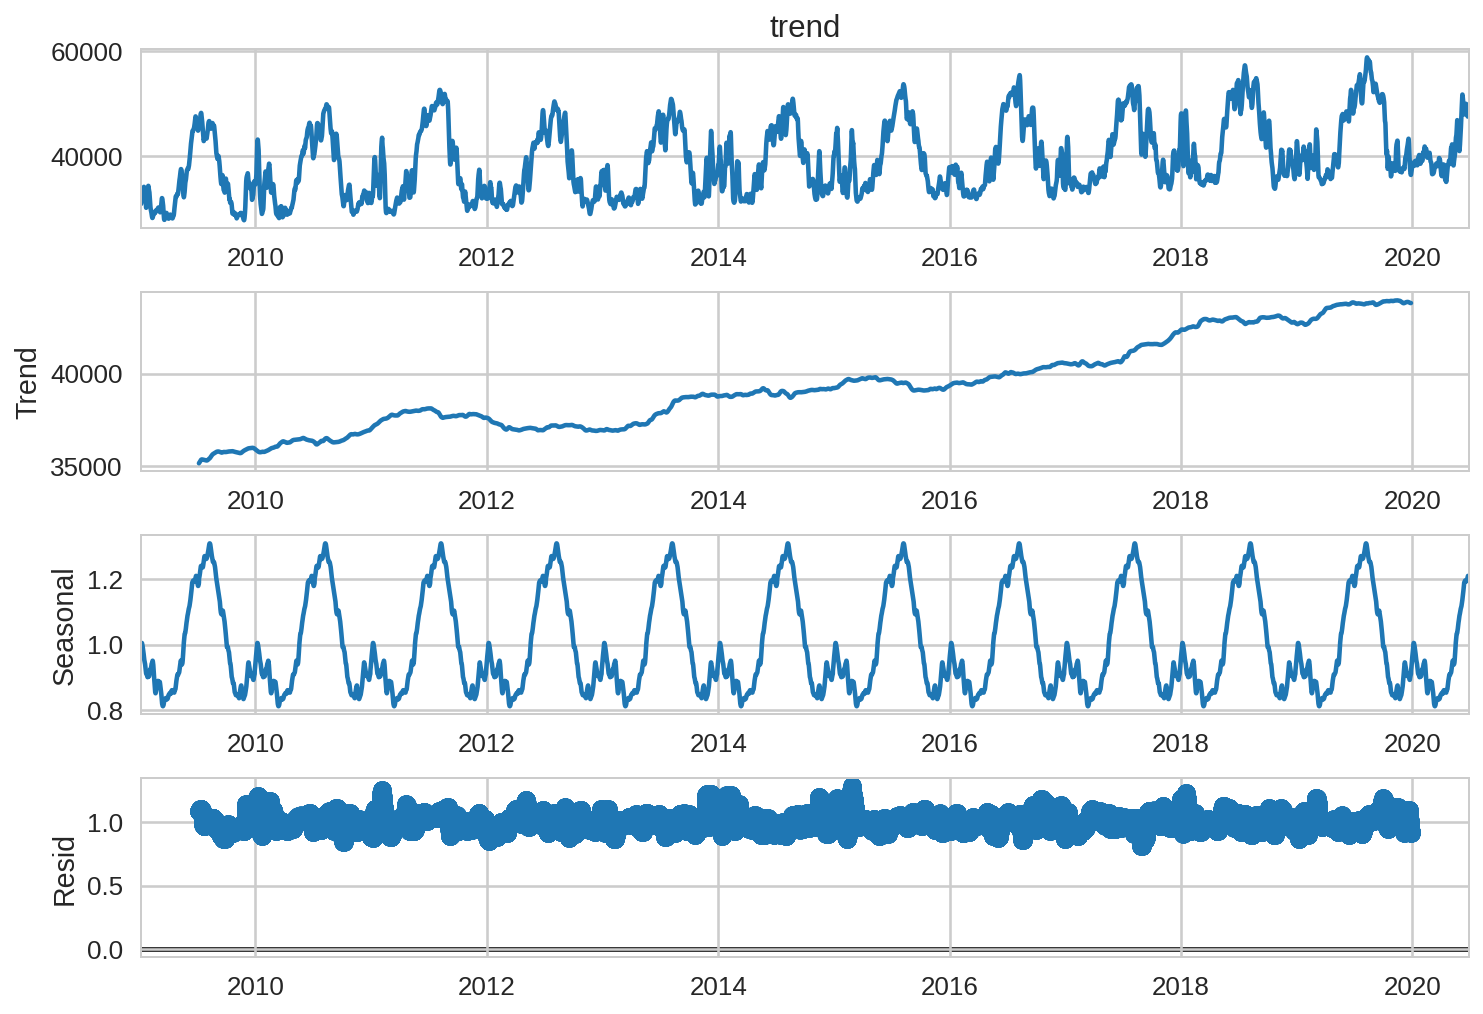

In [74]:
decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*365)  
fig = decomposition.plot()  

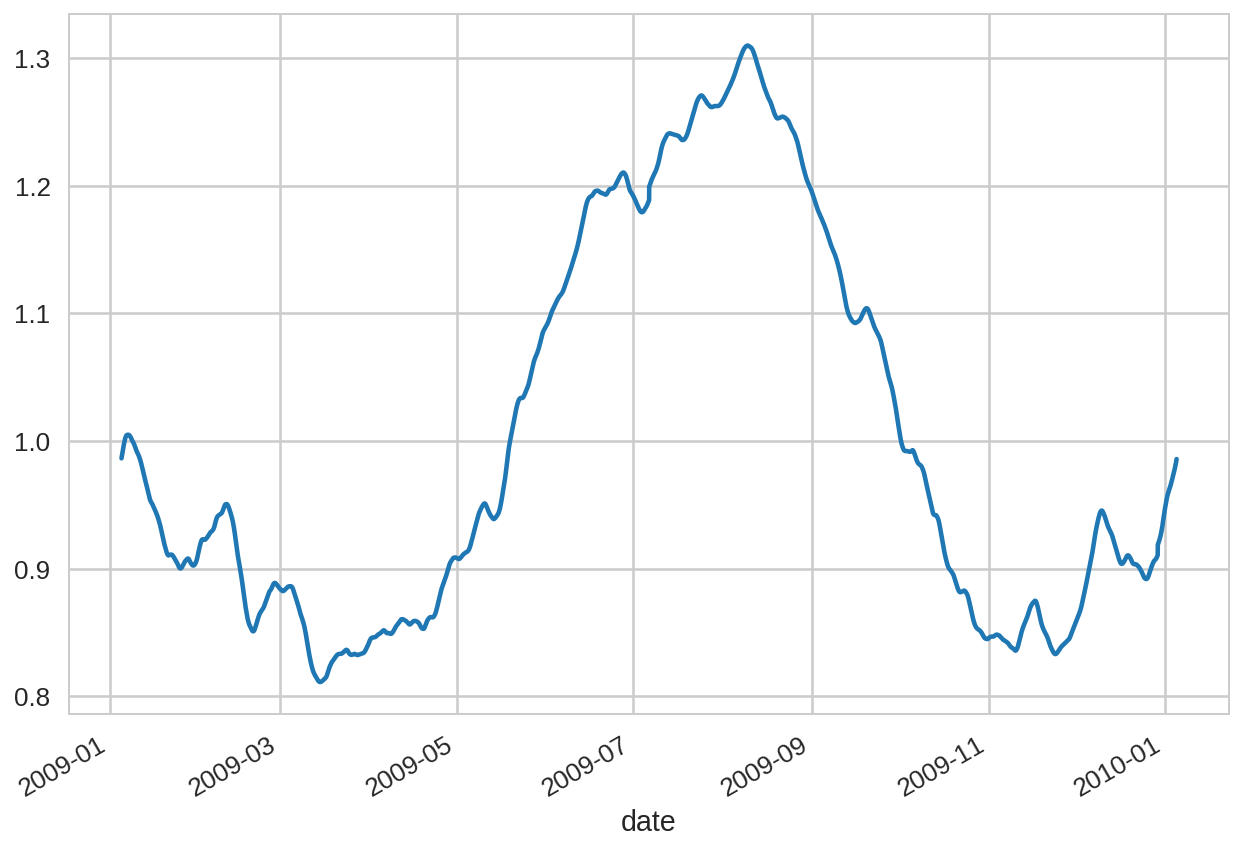

In [75]:
yearly_seasonal = decomposition.seasonal[:24*365]
yearly_seasonal.plot()

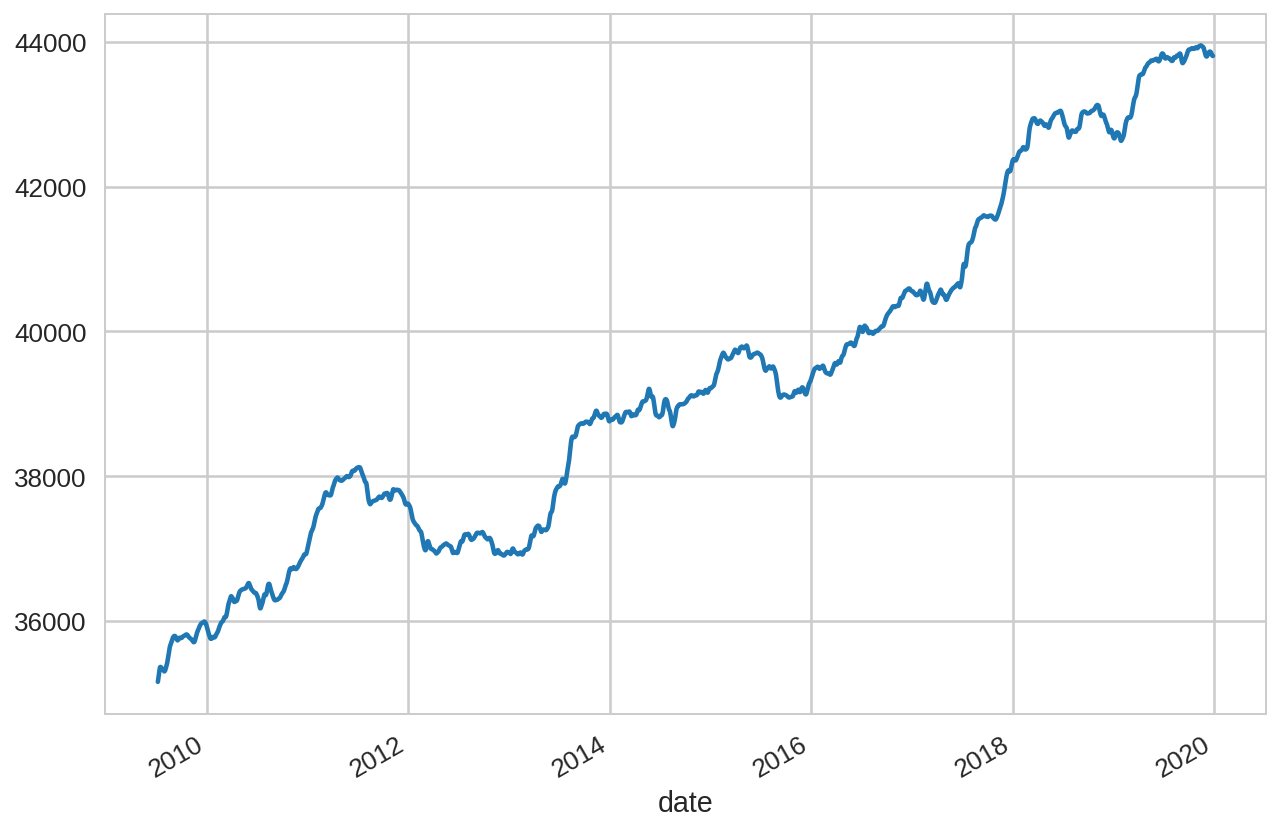

In [76]:
trend = decomposition.trend[365*12:-365*12]
trend.plot()

## FFT

In [77]:
# Detrend the original series, keeping only the seasonal components
y = (df.ERCOT[365*12+12*7+12:-(365*12+12*7+12)] - trend)
y = y - y.mean()

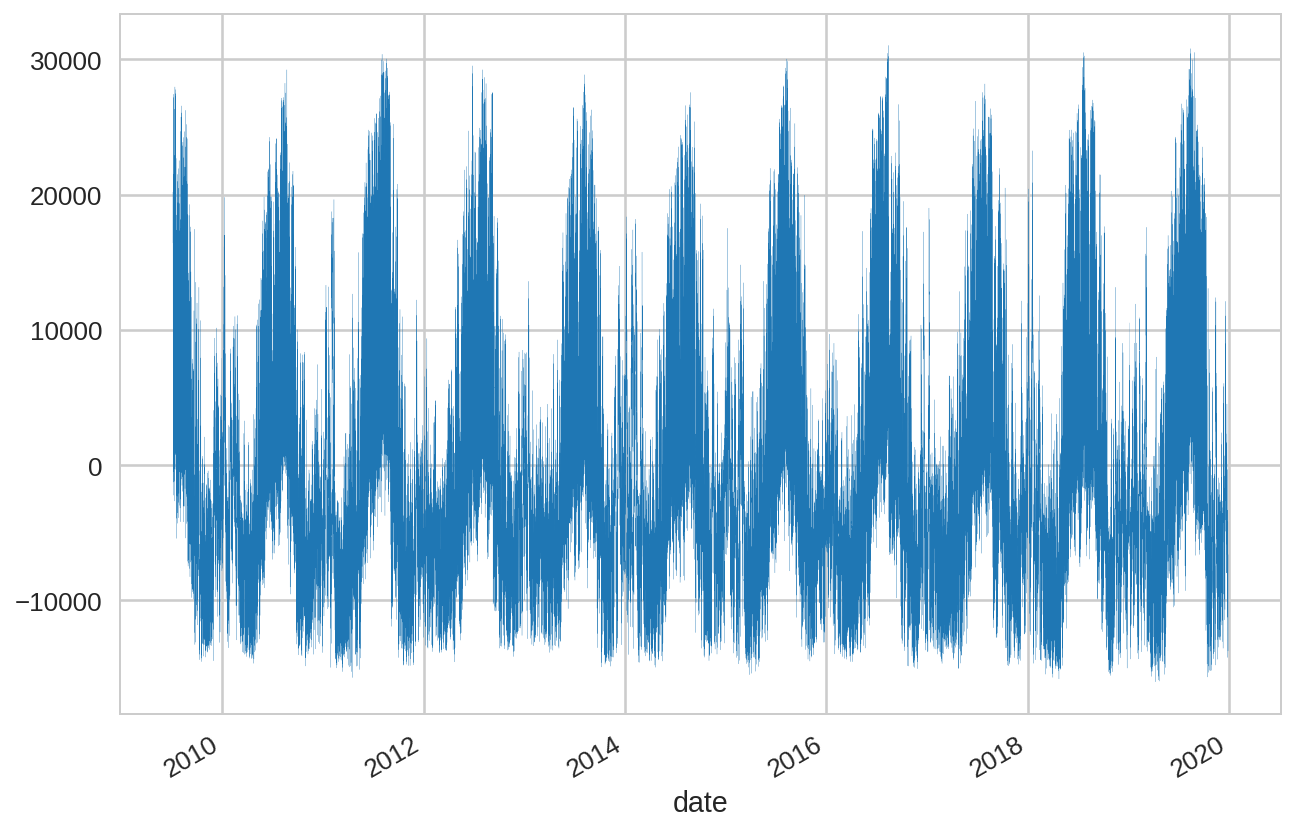

In [78]:
y.plot( linewidth = 0.1 )

In [79]:
# https://matplotlib.org/gallery/lines_bars_and_markers/spectrum_demo.html
# Apparently Matplotlib has built-in function for plotting spectrum

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# dt = 1  # sampling interval
# Fs = 1 / dt  # sampling frequency

# plot different spectrum types:
# axes[0].set_title("Magnitude Spectrum")
# axes[0].magnitude_spectrum(y, Fs=Fs, color='C1', linewidth=0.5)

# axes[1].set_title("Log. Magnitude Spectrum")
# axes[1].magnitude_spectrum(y, Fs=Fs, scale='dB', color='C1', linewidth=0.5)

In [80]:
# https://ericstrong.org/fast-fourier-transforms-in-python/

In [81]:
import scipy
import numpy as np

In [82]:
N = len(y)

# Nyquist Sampling Criteria
T = 1 # 1 hour, inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = scipy.fftpack.dct(y)


logf = np.log(2/N * np.abs(yf[:N//2]))

AttributeError: 'Series' object has no attribute 'flags'

In [ ]:
len(x)

In [ ]:
x

In [ ]:
len(logf)

In [ ]:
logf

In [ ]:
log_spectrum = pd.DataFrame( list(zip(x,logf)) , columns=['Frequency', 'LogMagnitude'] )
log_spectrum['Days'] = 2 * (1/log_spectrum.Frequency) // 24
# log_spectrum.set_index('Days', inplace=True)

In [ ]:
major_frequency = log_spectrum.LogMagnitude.idxmax()
log_spectrum.iloc[major_frequency] # expressed in days

In [ ]:
log_spectrum.plot.scatter(x='Frequency', y='LogMagnitude', s=1, alpha=0.5, ylim=(-5,15), xlim=(0.01,0.5))

In [ ]:
log_spectrum.set_index('Frequency')['LogMagnitude'].plot(linewidth=0.5, alpha=0.8, ylim=(-5,15))